# **Limpieza de datos**

### En este archivo visualizaremos, limpiaremos y analizaremos los datos de la carpeta data.

Comenzamos importando todas las dependecias necesarias para el correcto funcionamiento del documento, aunque primero hay que asegurarnos que las tenemos instaladas.

In [3]:
# Instalamos librerías
%pip install pandas
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importamos librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El siguiente paso es cargar los datos.

In [5]:
# Cargamos los datos
equipos = pd.read_csv('../data/equipos.csv')
overall = pd.read_csv('../data/overall.csv')
partidos = pd.read_csv('../data/partidos.csv')

Ahora iremos analizando tabla por tabla.

## Tabla Equipos

Comenzamos mostrando su dimensión y sus primeras filas para ver que información contiene.

In [6]:
print(equipos.shape)
equipos.head()

(640, 17)


,Season,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,nlAjax,19,26.4,53.2,6,66,540,6.0,11,9,20,10,1,1,15.0,1.0
1,2022-2023,esAtlético Madrid,22,28.6,56.5,6,66,540,6.0,4,3,7,4,0,2,11.0,0.0
2,2022-2023,esBarcelona,26,26.4,64.8,6,66,540,6.0,12,10,22,12,0,0,9.0,0.0
3,2022-2023,deBayern Munich,24,26.6,56.1,10,110,900,10.0,21,19,40,20,1,1,20.0,1.0
4,2022-2023,ptBenfica,24,26.0,52.9,10,110,900,10.0,25,16,41,20,5,5,19.0,0.0


Vemos que tenemos una tabla con 16 columnas y 640 filas. Hablemos de lo que es cada columna:
- 'Season' nos dice de qué temporada es el dato.
- 'Squad' es el nombre del equipo de fútbol.
- '# Pl' es el número de jugadores que se han usado en los partidos.
- 'Age' nos dice la edad media de los jugadores del equipo.
- 'Poss' es la posesión del equipo de la pelota, que se calcula como el porcentaje de intentos de pasos.
- 'MP' es el número de partidos jugados.
- 'Starts' son los partidos empezados por el jugador.
- 'Min' son los minutos que ha jugado el equipo.
- '90s' es el número de minutos jugados partido de 90.
- 'Gls' son los goles marcados o permitidos.
- 'Ast' asistencias (pase que un jugador realiza a un compañero de equipo y que resulta en un gol).
- 'G + A', goles y asistencias.
- 'G - PK' nos dice los goles que no vienen de penales.
- 'PK' son los goles que sí que vienen de penales.
- 'PKatt' nos dice cuales son los tiros que han hecho por penales (cuenta los que han sido gol y los que no).
- 'CrdY', las tarjetas amarillas que ha tenido el equipo a lo largo del campeonato. 
- 'CrdR', las tarjetas rojas que ha tenido el equipo a lo largo del campeonato.

Una vez vista la información que contiene esta tabla, veamos si tiene datos nulos y si el tipo de datos de cada columna es el correcto.

In [7]:
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   Poss    288 non-null    float64
 5   MP      640 non-null    int64  
 6   Starts  640 non-null    int64  
 7   Min     288 non-null    object 
 8   90s     288 non-null    float64
 9   Gls     640 non-null    int64  
 10  Ast     640 non-null    int64  
 11  G+A     640 non-null    int64  
 12  G-PK    640 non-null    int64  
 13  PK      640 non-null    int64  
 14  PKatt   640 non-null    int64  
 15  CrdY    576 non-null    float64
 16  CrdR    576 non-null    float64
dtypes: float64(5), int64(9), object(3)
memory usage: 85.1+ KB


Vemos que hay algunas columnas que tienen más de la mitad de los valores nulos. Vamos a borrarlas.

In [8]:
equipos = equipos.drop(columns=['Poss', 'Min', '90s'])
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), object(2)
memory usage: 70.1+ KB


Podemos cambiar las columnas objeto (Season y Squad) a str.

In [9]:
# Pasamos a string
equipos['Season'] = equipos['Season'].astype('string')
equipos['Squad'] = equipos['Squad'].astype('string')

# Nos aseguramos de que se hayan hecho los cambios correctamente
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    string 
 1   Squad   640 non-null    string 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), string(2)
memory usage: 70.1 KB


Lo siguiente que podemos hacer es ver que en la columna de 'Squad' aparece junto al nombre del equipo una abreviatura del país al que pertece. No nos interesa tenerlo en este formato, así que vamos a iterar sobre los valores de esta columna, eliminar la abreviatura de este país y añadir una nueva columna al lado que sea indique el país al que pertenece el equipo. Haremos esto haciendo uso del siguiente diccionario.

In [10]:
# Creamos un diccionario con los paises y sus abreviaturas
paises_dict = {
    'Alemania': 'de',
    'España': 'es',
    'Inglaterra': 'eng',
    'Italia': 'it',
    'Francia': 'fr',
    'Países bajos': 'nl',
    'Portugal': 'pt',
    'Bélgica': 'be',
    'Escocia': 'sct',
    'Irlanda': 'ie',
    'Gales': 'wal',
    'República checa': 'cz',
    'Polonia': 'pl',
    'Suiza': 'ch',
    'Austria': 'at',
    'Dinamarca': 'dk',
    'Suecia': 'se',
    'Noruega': 'no',
    'Eslovenia': 'si',
    'Eslovaquia': 'sk',
    'Hungría': 'hu',
    'Rumanía': 'ro',
    'Bulgaria': 'bg',
    'Croacia': 'hr',
    'Serbia': 'rs',
    'Grecia': 'gr',
    'Moldavia': 'md',
    'Chipre': 'cy',
    'Rusia': 'ru',
    'Bielorrusia': 'by',
    'Ucrania': 'ua',
    'Turquía': 'tr',
    'Israel': 'il',
    'Azerbaiyán': 'az',
    'Kazajistán': 'kz'
}

# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises = []

# Iteramos sobre la columna 'Squad'
for i, equipo in enumerate(equipos['Squad']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario
        if equipo.startswith(value) or equipo.endswith(value):
            equipos.loc[i, 'Squad'] = equipo.replace(value, '')
            paises.append(key)
            break
        
# Agregamos la columna 'Country' al dataframe en la posición 2
equipos.insert(2, 'Country', paises)

# Nos aseguramos de que se haya agregado correctamente
equipos.head()

,Season,Squad,Country,# Pl,Age,MP,Starts,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,Ajax,Países bajos,19,26.4,6,66,11,9,20,10,1,1,15.0,1.0
1,2022-2023,Atlético Madrid,España,22,28.6,6,66,4,3,7,4,0,2,11.0,0.0
2,2022-2023,Barcelona,España,26,26.4,6,66,12,10,22,12,0,0,9.0,0.0
3,2022-2023,Bayern Munich,Alemania,24,26.6,10,110,21,19,40,20,1,1,20.0,1.0
4,2022-2023,Benfica,Portugal,24,26.0,10,110,25,16,41,20,5,5,19.0,0.0


Una vez limpio el dataset, hagamos unas gráficas.

Por ejemplo, veamos que país es el que marca más goles. Podríamos hacer lo mismo con equipos en vez de países, pero son muchos equipos diferentes lo cual podría dificultar la visibilidad de la gráfica. 

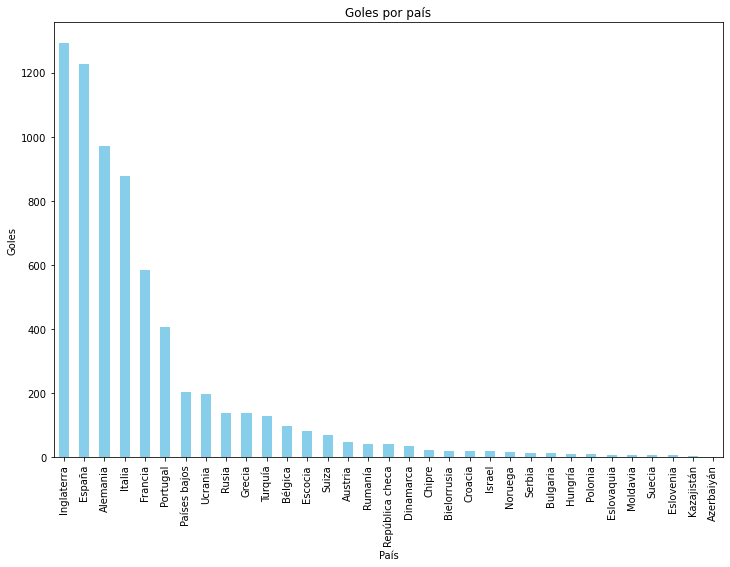

In [11]:
# Primero agrupamos por país 
goles_por_pais = equipos.groupby('Country')['Gls'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='skyblue')
plt.title('Goles por país')
plt.xlabel('País')
plt.ylabel('Goles')
plt.show()

Podemos hacer lo mismo con la edad, las tarjetas rojas y las tarjetas amarillas. Sin embargo, no buscamos que nos sume todas las edades, buscamos que nos haga la media de las edades.

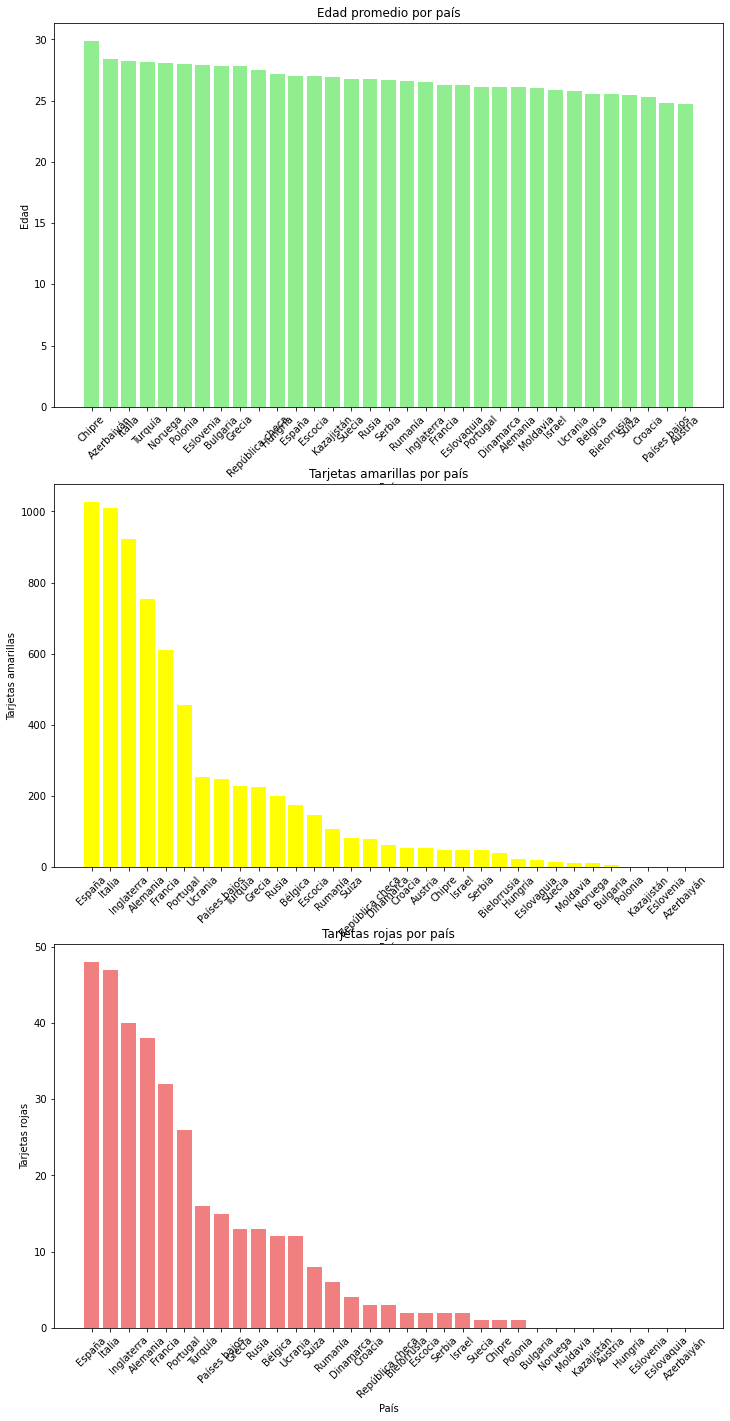

In [12]:
# Primero agrupamos 
edad_por_pais = equipos.groupby('Country')['Age'].mean().sort_values(ascending=False) # Edad promedio
crdy_por_pais = equipos.groupby('Country')['CrdY'].sum().sort_values(ascending=False)
crdr_por_pais = equipos.groupby('Country')['CrdR'].sum().sort_values(ascending=False)

# Graficamos
fg, ax = plt.subplots(3, 1, figsize=(12, 24))

ax[0].bar(edad_por_pais.index, edad_por_pais, color='lightgreen')
ax[0].set_title('Edad promedio por país')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Edad')
ax[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[1].bar(crdy_por_pais.index, crdy_por_pais, color='yellow')
ax[1].set_title('Tarjetas amarillas por país')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Tarjetas amarillas')
ax[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[2].bar(crdr_por_pais.index, crdr_por_pais, color='lightcoral')
ax[2].set_title('Tarjetas rojas por país')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Tarjetas rojas')
ax[2].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

plt.show()

Terminamos el análisis de la tabla de equipos. Pasemos a la siguiente

## Tabla Overall

Empezamos visualizando los datos.

In [13]:
print(overall.shape)
overall.head()

(774, 15)


,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2023-2024,QF,engManchester City,8.0,8.0,0.0,0.0,24.0,9.0,15.0,24.0,"51,047",Erling Haaland-6,Ederson,NaN
1,2023-2024,QF,esReal Madrid,8.0,7.0,1.0,0.0,18.0,8.0,10.0,22.0,"70,851",Jude Bellingham-4,"Kepa Arrizabalaga,Andriy Lunin",NaN
2,2023-2024,QF,deBayern Munich,8.0,6.0,1.0,1.0,15.0,7.0,8.0,19.0,"75,000",Harry Kane-6,Manuel Neuer,NaN
3,2023-2024,QF,esAtlético Madrid,8.0,5.0,2.0,1.0,19.0,8.0,11.0,17.0,"63,844",Antoine Griezmann-6,Jan Oblak,NaN
4,2023-2024,QF,engArsenal,8.0,5.0,1.0,2.0,17.0,5.0,12.0,16.0,"59,782",Gabriel Jesus-4,David Raya,NaN


Vemos que tenemos 740 filas y 15 columnas. Hablemos de las columnas:
- 'Season' es la temporada a la que pertenece la información de esa fila.
- 'Rk' es el puesto en el que ha quedado ese equipo en esa temporada.
- 'Squad' es el equipo.
- 'MP', el número de partidos jugados.
- 'W' el número de victorias.
- 'D' el número de empates.
- 'L' el número de derrotas.
- 'GF' los goles a favor.
- 'GA' los goles en contra. 
- 'GD' la diferencia de los goles (GF - GA).
- 'Pts' son los puntos de la liga (3 puntos si ganas, 1 por empate).
- 'Attendance', asistencia por partido durante esta temporada, solo para partidos en casa.
- 'Top Team Scorer', el jugador con más goles de los partidos de las ligas de esa temporada.
- 'Goalkeeper', el portero del equipo con más minutos jugado en el torneo.
- 'Notes', notas para añadir información a la fila.

Veamos los tipos de datos de cada columna y sus valores nulos.

In [14]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           774 non-null    object 
 1   Rk               672 non-null    object 
 2   Squad            672 non-null    object 
 3   MP               672 non-null    float64
 4   W                672 non-null    float64
 5   D                672 non-null    float64
 6   L                672 non-null    float64
 7   GF               672 non-null    float64
 8   GA               672 non-null    float64
 9   GD               672 non-null    float64
 10  Pts              672 non-null    float64
 11  Attendance       657 non-null    object 
 12  Top Team Scorer  669 non-null    object 
 13  Goalkeeper       672 non-null    object 
 14  Notes            9 non-null      object 
dtypes: float64(8), object(7)
memory usage: 90.8+ KB


Vemos que la útima columna está casi vacía. Como apenas nos aporta información, la borraremos. 

La columna 'Top Team Scorer' incluye el número de goles que ha metido en el torneo el jugador nombrado en dicha columna. Vamos a separarlo en dos columnas: 'Top Team Scorer' y 'Top Team Scorer Goals'.

In [15]:
# Eliminamos las columnas que no nos interesan
overall = overall.drop(columns=['Notes'])

# Separamos el nombre del jugador y el número de goles
# Usamos str.rsplit() ya que el nombre del jugador puede contener guiones
overall[['Top Team Scorer', 'Top Team Scorer Goals']] = overall['Top Team Scorer'].str.rsplit('-', n=1, expand=True)

# Nos aseguramos de que se hayan hecho los cambios correctamente
overall.head()

,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals
0,2023-2024,QF,engManchester City,8.0,8.0,0.0,0.0,24.0,9.0,15.0,24.0,"51,047",Erling Haaland,Ederson,6
1,2023-2024,QF,esReal Madrid,8.0,7.0,1.0,0.0,18.0,8.0,10.0,22.0,"70,851",Jude Bellingham,"Kepa Arrizabalaga,Andriy Lunin",4
2,2023-2024,QF,deBayern Munich,8.0,6.0,1.0,1.0,15.0,7.0,8.0,19.0,"75,000",Harry Kane,Manuel Neuer,6
3,2023-2024,QF,esAtlético Madrid,8.0,5.0,2.0,1.0,19.0,8.0,11.0,17.0,"63,844",Antoine Griezmann,Jan Oblak,6
4,2023-2024,QF,engArsenal,8.0,5.0,1.0,2.0,17.0,5.0,12.0,16.0,"59,782",Gabriel Jesus,David Raya,4


Observamos que hay dos columnas categóricas que son tipo object cuando deberían ser numéricas. Hagamos el cambio, pero hay que tener en cuenta que los valores de la columna 'Attendance' contienen comas, por lo que antes de cambiar de tipo de dato, tenemos que asegurarnos de eliminarlas.

In [16]:
# Pasamos a float
overall['Attendance'] = overall['Attendance'].str.replace(',', '').astype(float)
overall['Top Team Scorer Goals'] = overall['Top Team Scorer Goals'].astype(float)

# Nos aseguramos de que se hayan hecho los cambios correctamente
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 774 non-null    object 
 1   Rk                     672 non-null    object 
 2   Squad                  672 non-null    object 
 3   MP                     672 non-null    float64
 4   W                      672 non-null    float64
 5   D                      672 non-null    float64
 6   L                      672 non-null    float64
 7   GF                     672 non-null    float64
 8   GA                     672 non-null    float64
 9   GD                     672 non-null    float64
 10  Pts                    672 non-null    float64
 11  Attendance             657 non-null    float64
 12  Top Team Scorer        669 non-null    object 
 13  Goalkeeper             672 non-null    object 
 14  Top Team Scorer Goals  669 non-null    float64
dtypes: flo

A simple vista se puede ver que hay filas que tienen todos los datos vacíos a excepción de la temporada. Borremos estas filas.

In [17]:
# Con la cariable thresh le decimos que queremos que elimine las filas que tengan al menos dos valores nulos
# También reseteamos el índice
overall = overall.dropna(thresh=2).reset_index(drop=True)

# Nos aseguramos de que se hayan eliminado correctamente
print(overall.shape)
overall.head()

(672, 15)


,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals
0,2023-2024,QF,engManchester City,8.0,8.0,0.0,0.0,24.0,9.0,15.0,24.0,51047.0,Erling Haaland,Ederson,6.0
1,2023-2024,QF,esReal Madrid,8.0,7.0,1.0,0.0,18.0,8.0,10.0,22.0,70851.0,Jude Bellingham,"Kepa Arrizabalaga,Andriy Lunin",4.0
2,2023-2024,QF,deBayern Munich,8.0,6.0,1.0,1.0,15.0,7.0,8.0,19.0,75000.0,Harry Kane,Manuel Neuer,6.0
3,2023-2024,QF,esAtlético Madrid,8.0,5.0,2.0,1.0,19.0,8.0,11.0,17.0,63844.0,Antoine Griezmann,Jan Oblak,6.0
4,2023-2024,QF,engArsenal,8.0,5.0,1.0,2.0,17.0,5.0,12.0,16.0,59782.0,Gabriel Jesus,David Raya,4.0


Hemos eliminado 100 filas del dataframe.

Al igual que en la tabla anterior, los equipos tienen junto a su nombre la abreviación del país del que vienen. Quitemos esa abreviación y agregemos una columna nueva con el país.

In [18]:
# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises = []

# Iteramos sobre la columna 'Squad'
for i, fila in enumerate(overall['Squad']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario, pero primero verificamos que sea un string
        if (fila.startswith(value) or fila.endswith(value)):
            overall.loc[i, 'Squad'] = fila.replace(value, '')
            paises.append(key)
            break 

# Agregamos la columna 'Country' al dataframe en la posición 3
overall.insert(3, 'Country', paises)

# Nos aseguramos de que se haya agregado correctamente
overall.head()

,Season,Rk,Squad,Country,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals
0,2023-2024,QF,Manchester City,Inglaterra,8.0,8.0,0.0,0.0,24.0,9.0,15.0,24.0,51047.0,Erling Haaland,Ederson,6.0
1,2023-2024,QF,Real Madrid,España,8.0,7.0,1.0,0.0,18.0,8.0,10.0,22.0,70851.0,Jude Bellingham,"Kepa Arrizabalaga,Andriy Lunin",4.0
2,2023-2024,QF,Bayern Munich,Alemania,8.0,6.0,1.0,1.0,15.0,7.0,8.0,19.0,75000.0,Harry Kane,Manuel Neuer,6.0
3,2023-2024,QF,Atlético Madrid,España,8.0,5.0,2.0,1.0,19.0,8.0,11.0,17.0,63844.0,Antoine Griezmann,Jan Oblak,6.0
4,2023-2024,QF,Arsenal,Inglaterra,8.0,5.0,1.0,2.0,17.0,5.0,12.0,16.0,59782.0,Gabriel Jesus,David Raya,4.0


Veamos que valores puede tomar la columna 'Rk'.

In [19]:
rankings = overall['Rk'].value_counts()
print(rankings)

GR     336
R16    168
QF      88
SF      40
W       18
F       18
1        2
2        2
Name: Rk, dtype: int64


Vemos que hay algunos que valen '1' y '2', que serían equivalentes a 'W' y 'F' respectivamente. Cambiémoslo para que sean iguales.

In [20]:
# Reemplazamos los valores de la columna 'Rk' por 'W' y 'F' 
overall['Rk'] = overall['Rk'].replace('1', 'W')
overall['Rk'] = overall['Rk'].replace('2', 'F')

rankings = overall['Rk'].value_counts()
print(rankings)

GR     336
R16    168
QF      88
SF      40
W       20
F       20
Name: Rk, dtype: int64


Ahora, comenzemos a graficar. Podemos hacer un pie chart de los rankings que ha tenido España a lo largo de la historia de la UEFA.

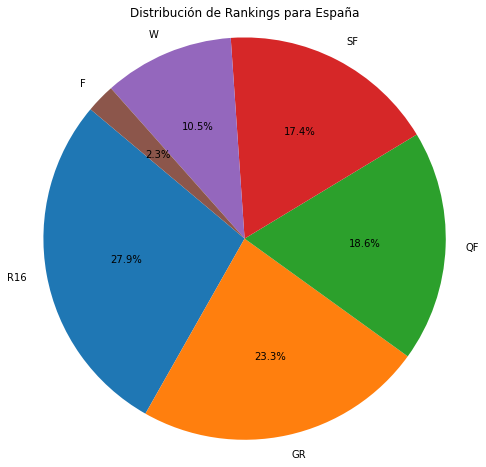

In [21]:
# Filtrar el DataFrame para obtener solo las filas correspondientes al país de interés
pais = 'España' 
datos_esp = overall[overall['Country'] == pais]

# Contar el número de ocurrencias de cada ranking
rankings = datos_esp['Rk'].value_counts()

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(rankings, labels=rankings.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Rankings para ' + pais)
plt.axis('equal')
plt.show()


También podemos ver qué país ha ganado más puntos.

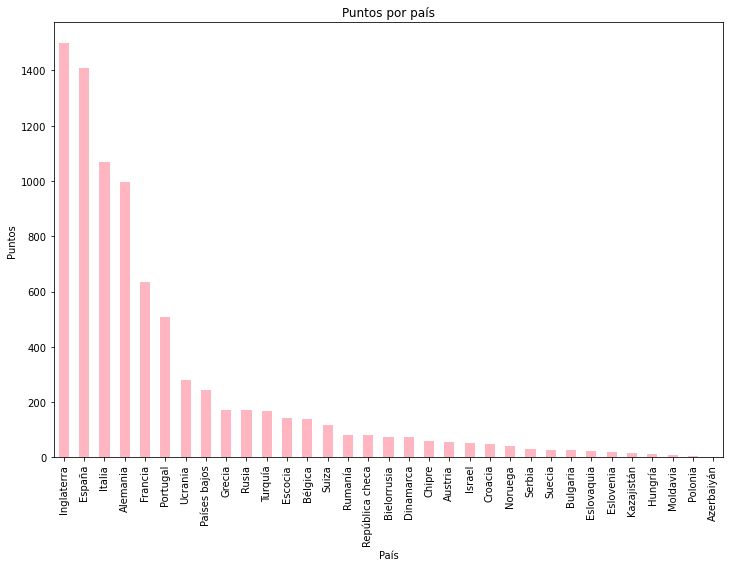

In [22]:
# Primero agrupamos por país 
goles_por_pais = overall.groupby('Country')['Pts'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='lightpink')
plt.title('Puntos por país')
plt.xlabel('País')
plt.ylabel('Puntos')
plt.show()

Otra idea es ver cual es la media de puntos de un país por cada temporada. 

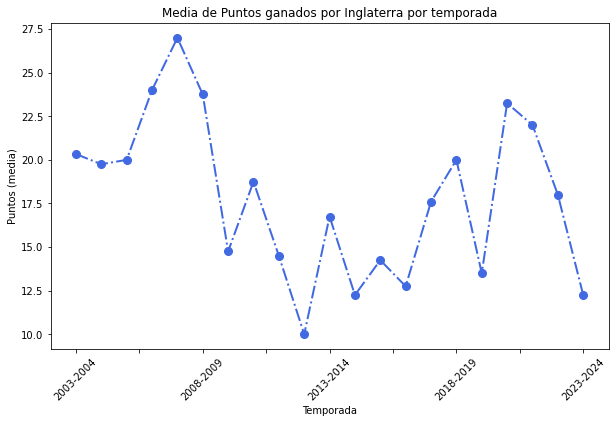

In [23]:
# Filtrar los datos solo para Inglaterra
datos_inglaterra = overall[overall['Country'] == 'Inglaterra']

# Agrupar por temporada y calulamos la media de los puntos ganados por Inglaterra en cada temporada
puntos_inglaterra_por_temporada = datos_inglaterra.groupby('Season')['Pts'].mean()

# Graficar los puntos ganados por Inglaterra a lo largo de los años
plt.figure(figsize=(10, 6))
puntos_inglaterra_por_temporada.plot(color='royalblue', marker='o', linestyle='-.', linewidth=2, markersize=8)
plt.title('Media de Puntos ganados por Inglaterra por temporada')
plt.xlabel('Temporada')
plt.ylabel('Puntos (media)')
plt.xticks(rotation=45)
plt.show()


Ahora toca analizar la última tabla.

## Tabla partidos

Comenzamos viendo por encima sus datos.

In [24]:
print(partidos.shape)
partidos.head()

(634, 13)


,Season,Round,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,Match Report,Notes
0,2022-2023,Round of 16,Tue,2023-02-14,21:00,Milanit,1–0,engTottenham,"74,320",Stadio Giuseppe Meazza,Sandro Schärer,Match Report,Leg 1 of 2
1,2022-2023,Round of 16,Tue,2023-02-14,21:00,Paris S-Gfr,0–1,deBayern Munich,"46,435",Parc des Princes,Michael Oliver,Match Report,Leg 1 of 2
2,2022-2023,Round of 16,Wed,2023-02-15,21:00,Club Bruggebe,0–2,ptBenfica,"24,136",Jan Breydelstadion,Davide Massa,Match Report,Leg 1 of 2
3,2022-2023,Round of 16,Wed,2023-02-15,21:00,Dortmundde,1–0,engChelsea,"81,365",Signal Iduna Park,Jesús Gil,Match Report,Leg 1 of 2
4,2022-2023,Round of 16,Tue,2023-02-21,20:00,Liverpooleng,2–5,esReal Madrid,"52,337",Anfield,István Kovács,Match Report,Leg 1 of 2


Vemos que tenemos 634 filas y 13 columnas. Veamos qué es cada columna:
- 'Season', la temporada a la que pertenece la información de dicha fila.
- 'Round', en qué fase del torneo se jugó ese partido.
- 'Day', día de la semana en la que se jugó el partido.
- 'Date' es la fecha en la que se jugó el partido.
- 'Time' es la hora a la que comenzó el partido.
- 'Home', nos dice el equipo que jugó desde su estadio.
- 'Score', el resultado del partido.
- 'Away', el equipo que jugó fuera de casa.
- 'Attendance' son los espectadores que acudieron al estadio.
- 'Venue' es el estadio en donde se jugó el partido.
- 'Referee', el árbitro del partido.
- 'Math Report', un reportaje del partido.
- 'Notes', notas adicionales del partido.

Veamos los tipos de datos y los valores no nulos que hay en este dataframe.

In [25]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        634 non-null    object
 1   Round         574 non-null    object
 2   Day           574 non-null    object
 3   Date          574 non-null    object
 4   Time          255 non-null    object
 5   Home          574 non-null    object
 6   Score         574 non-null    object
 7   Away          574 non-null    object
 8   Attendance    214 non-null    object
 9   Venue         574 non-null    object
 10  Referee       574 non-null    object
 11  Match Report  574 non-null    object
 12  Notes         553 non-null    object
dtypes: object(13)
memory usage: 64.5+ KB


Podemos ver que hay muchas filas a las que le faltan valores en todas las columnas menos en 'Season'. Busquemos y borremos estas filas. 

Aunque la columna 'Attendance' pueda ser muy útil, hay muy pocos datos así que prescindiremos de ella. También podemos borrar las columnas 'Match Report' y 'Notes' ya que no nos aportan nada de información.

Además, los valores de todas las columnas de tipo objeto. Podemos cambiar a string 'Season', 'Round', 'Day', 'Home', 'Score', 'Away', 'Venue' y 'Referee' y podemos cambiar a date o datetime las columnas 'Date' y 'Time'.

In [26]:
# Buscamos filas con muchos valores nulos y reindexamos
partidos = partidos.dropna(thresh=2).reset_index(drop=True)

# Borramos las columnas que no nos interesan
partidos = partidos.drop(columns=['Attendance', 'Match Report', 'Notes'])

# Convertimos las columnas a string
partidos['Season'] = partidos['Season'].astype('string')
partidos['Round'] = partidos['Round'].astype('string')
partidos['Day'] = partidos['Day'].astype('string')
partidos['Home'] = partidos['Home'].astype('string')
partidos['Score'] = partidos['Score'].astype('string')
partidos['Away'] = partidos['Away'].astype('string')
partidos['Venue'] = partidos['Venue'].astype('string')
partidos['Referee'] = partidos['Referee'].astype('string')

# Creamos una nueva columna con la fecha y la hora
partidos.insert(3, 'Date Time', pd.to_datetime(partidos['Date'] + ' ' + partidos['Time']))
# Y borramos las columnas que ya no necesitamos
partidos = partidos.drop(columns=['Date', 'Time'])

# Nos aseguramos de que se hayan hecho los cambios correctamente
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Season     574 non-null    string        
 1   Round      574 non-null    string        
 2   Day        574 non-null    string        
 3   Date Time  255 non-null    datetime64[ns]
 4   Home       574 non-null    string        
 5   Score      574 non-null    string        
 6   Away       574 non-null    string        
 7   Venue      574 non-null    string        
 8   Referee    574 non-null    string        
dtypes: datetime64[ns](1), string(8)
memory usage: 40.5 KB


Como ha sucedido en las tablas anteriores, la abreviación del país del equipo está donde no debería. Vamos a cambiarlo.

In [27]:
# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises_home = []
paises_away = []

# Iteramos sobre la columna 'Home'
for i, equipo in enumerate(partidos['Home']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario, pero primero verificamos que sea un string
        if (equipo.startswith(value) or equipo.endswith(value)):
            partidos.loc[i, 'Home'] = equipo.replace(value, '')
            paises_home.append(key)
            break 

# Iteramos sobre la columna 'Away'
for i, equipo in enumerate(partidos['Away']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario, pero primero verificamos que sea un string
        if (equipo.startswith(value) or equipo.endswith(value)):
            partidos.loc[i, 'Away'] = equipo.replace(value, '')
            paises_away.append(key)
            break 

# Agregamos la columna 'Country (Home)' al dataframe en la posición 5
partidos.insert(5, 'Country (Home)', paises_home)
# Agregamos la columna 'Country (Away)' al dataframe en la posición 7
partidos.insert(7, 'Country (Away)', paises_away)

# Nos aseguramos de que se haya agregado correctamente
partidos.head()

,Season,Round,Day,Date Time,Home,Country (Home),Score,Country (Away),Away,Venue,Referee
0,2022-2023,Round of 16,Tue,2023-02-14 21:00:00,Milan,Italia,1–0,Inglaterra,Tottenham,Stadio Giuseppe Meazza,Sandro Schärer
1,2022-2023,Round of 16,Tue,2023-02-14 21:00:00,Paris S-G,Francia,0–1,Alemania,Bayern Munich,Parc des Princes,Michael Oliver
2,2022-2023,Round of 16,Wed,2023-02-15 21:00:00,Club Brugge,Bélgica,0–2,Portugal,Benfica,Jan Breydelstadion,Davide Massa
3,2022-2023,Round of 16,Wed,2023-02-15 21:00:00,Dortmund,Alemania,1–0,Inglaterra,Chelsea,Signal Iduna Park,Jesús Gil
4,2022-2023,Round of 16,Tue,2023-02-21 20:00:00,Liverpool,Inglaterra,2–5,España,Real Madrid,Anfield,István Kovács


Una vez limpios y analizados los datos, hacemos algunas gráficas. 

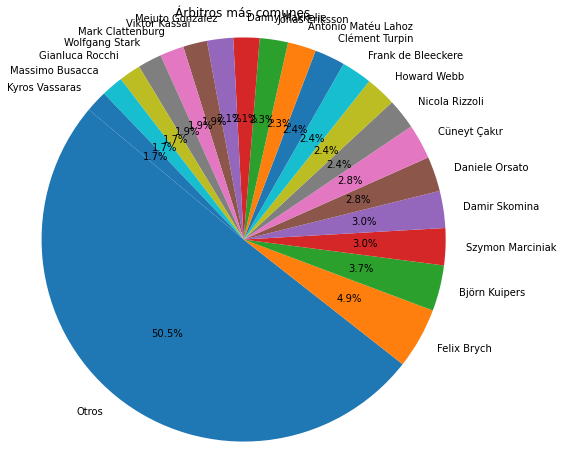

In [28]:
arbitros = partidos['Referee']

# Hacemos que si un árbitro ha pitado menos de 10 partidos, se agrupe en la categoría 'Otros'
otros = arbitros.value_counts()[arbitros.value_counts() < 10].index
arbitros.replace(otros, 'Otros', inplace=True)

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(arbitros.value_counts(), labels=arbitros.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Árbitros más comunes')
plt.axis('equal')
plt.show()

## Exportamos los datos limpios

Último paso del análisis de datos.

In [29]:
# Exportamos los datos limpios
equipos.to_csv('../data/equipos_limpio.csv', index=False)
overall.to_csv('../data/overall_limpio.csv', index=False)
partidos.to_csv('../data/partidos_limpio.csv', index=False)